In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Our algorithms, by from the easiest to the hardest to intepret.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
df = pd.read_csv('C:/Users/Kaushik/Documents/Kaggle Datasets/Machine Learning/Classification Datasets/Rain in Australia/weatherAUS.csv')
print('Size of weather data frame is :',df.shape)

Size of weather data frame is : (142193, 24)


In [2]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

In [3]:
df.count()

Date             142193
Location         142193
MinTemp          141556
MaxTemp          141871
Rainfall         140787
Evaporation       81350
Sunshine          74377
WindGustDir      132863
WindGustSpeed    132923
WindDir9am       132180
WindDir3pm       138415
WindSpeed9am     140845
WindSpeed3pm     139563
Humidity9am      140419
Humidity3pm      138583
Pressure9am      128179
Pressure3pm      128212
Cloud9am          88536
Cloud3pm          85099
Temp9am          141289
Temp3pm          139467
RainToday        140787
RISK_MM          142193
RainTomorrow     142193
dtype: int64

In [4]:
def missing_values():
    temp_dict = dict()
    for i in df.columns:
        if df[i].isnull().sum()>0:
            temp_dict[i] = df[i].isnull().sum()
    return temp_dict            
        

In [5]:
sorted(missing_values().items(),  key=lambda x: x[1])

[('MaxTemp', 322),
 ('MinTemp', 637),
 ('Temp9am', 904),
 ('WindSpeed9am', 1348),
 ('Rainfall', 1406),
 ('RainToday', 1406),
 ('Humidity9am', 1774),
 ('WindSpeed3pm', 2630),
 ('Temp3pm', 2726),
 ('Humidity3pm', 3610),
 ('WindDir3pm', 3778),
 ('WindGustSpeed', 9270),
 ('WindGustDir', 9330),
 ('WindDir9am', 10013),
 ('Pressure3pm', 13981),
 ('Pressure9am', 14014),
 ('Cloud9am', 53657),
 ('Cloud3pm', 57094),
 ('Evaporation', 60843),
 ('Sunshine', 67816)]

In [6]:
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date'],axis=1)

In [7]:
df = df.dropna(how='any') # will drop all the rows which has NaN

In [8]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [9]:
y = df["RainTomorrow"]
X = df.drop("RainTomorrow", axis=1)

In [10]:
def missing_values_x():
    temp_dict = dict()
    for i in X.columns:
        if X[i].isnull().sum()>0:
            temp_dict[i] = X[i].isnull().sum()
    return temp_dict 

In [11]:
y.isnull().sum()

0

In [12]:
X.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [13]:
dtypes_def = df.dtypes.reset_index()
dtypes_def.columns = ['Count','Column Type']
dtypes_def.groupby('Column Type').aggregate('count').reset_index()

Column Type  Count
0       int64      2
1     float64     12
2      object      3

In [14]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [15]:
num_features = list(X.select_dtypes(include ='float64').columns)

In [16]:
num_features.extend(list(X.select_dtypes(include ='int64').columns))

In [17]:
num_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [18]:
cat_features = list(X.select_dtypes(include ='object').columns)

In [19]:
preprocessor = ColumnTransformer([("numerical", "passthrough", num_features), 
                                  ("categorical", OneHotEncoder(sparse=False, handle_unknown="ignore"),
                                   cat_features)])

In [20]:
dtypes_def = df.dtypes.reset_index()
dtypes_def.columns = ['Count','Column Type']
dtypes_def.groupby('Column Type').aggregate('count').reset_index()

Column Type  Count
0       int64      2
1     float64     12
2      object      3

In [21]:
# Logistic Regression
lr_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42))])

# Decision Tree
dt_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", DecisionTreeClassifier(class_weight="balanced"))])

# Random Forest
rf_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestClassifier(class_weight="balanced", n_estimators=100, n_jobs=-1))])

# XGBoost
xgb_model = Pipeline([("preprocessor", preprocessor), 
                      # Add a scale_pos_weight to make it balanced
                      ("model", XGBClassifier(scale_pos_weight=(1 - y.mean()), n_jobs=-1))])

In [22]:
sorted(missing_values().items(),  key=lambda x: x[1])

[]

In [23]:
X_train,X_test, y_train, y_test = train_test_split(X,y,stratify = y, test_size = 0.3, random_state = 42)

In [24]:

from sklearn.metrics import accuracy_score
import time
t0=time.time()
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8516736525178582
Time taken : 3.290940046310425


In [25]:
# fine tune our logistic regression and evaluate its performance
gs = GridSearchCV(xgb_model, {"model__max_depth": [5, 10],
                              "model__min_child_weight": [5, 10],
                              "model__n_estimators": [25]}, n_jobs=-1, cv=5, scoring="accuracy")
gs.fit(X_train, y_train)    

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'WindGustSpeed',
               

In [26]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 10, 'model__min_child_weight': 5, 'model__n_estimators': 25}
0.8520753475780232


In [27]:
xgb_model.set_params(**gs.best_params_)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Temp9am', 'Temp3pm',
                                                   'RainToday']),
                                                 ('ca...
                               colsamp

In [28]:
xgb_model.get_params("model")

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('numerical', 'passthrough',
                                    ['MinTemp', 'MaxTemp', 'Rainfall',
                                     'WindGustSpeed', 'WindSpeed9am',
                                     'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                                     'Pressure9am', 'Pressure3pm', 'Temp9am',
                                     'Temp3pm', 'RainToday']),
                                   ('categorical',
                                    OneHotEncoder(categorical_features=None,
                                                  categories=None, drop=None,
                                                  dtype=<class 'numpy.float64'>,
                                                  handle_unknown='ignore',
                                           

In [29]:
xgb_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Temp9am', 'Temp3pm',
                                                   'RainToday']),
                                                 ('ca...
                               colsamp

In [30]:
y_pred = xgb_model.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.8543597614971368

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     26372
           1       0.79      0.47      0.59      7506

    accuracy                           0.85     33878
   macro avg       0.83      0.72      0.75     33878
weighted avg       0.85      0.85      0.84     33878



In [33]:
# use eli5 to visualise the weights associated to each feature
import eli5

Using TensorFlow backend.


In [34]:
eli5.show_weights(xgb_model.named_steps["model"])

In [35]:
preprocessor = xgb_model.named_steps["preprocessor"]

In [36]:
model_1 = xgb_model.named_steps["model"]

In [37]:
ohe_categories = preprocessor.named_transformers_["categorical"].categories_

In [38]:
new_ohe_features = [f"{col}__{val}" for col, vals in zip(cat_features, ohe_categories) for val in vals]

In [39]:
all_features = num_features + new_ohe_features

In [40]:
pd.DataFrame(xgb_model.named_steps["preprocessor"].transform(X_train), columns=all_features).head()

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     12.1     18.6       0.0           31.0          11.0          17.0   
1     13.8     26.0       0.0           39.0          15.0          20.0   
2      9.9     28.2       0.0           31.0          11.0          13.0   
3     19.2     23.4       0.0           41.0          11.0          19.0   
4     12.6     30.9       0.0           43.0          17.0          26.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  WindDir3pm__NNW  \
0         84.0         57.0       1017.5       1012.2  ...              0.0   
1         52.0         41.0       1022.1       1019.5  ...              0.0   
2         46.0         23.0       1017.1       1014.2  ...              0.0   
3         63.0         59.0       1013.1       1012.9  ...              0.0   
4         42.0         34.0       1018.5       1015.7  ...              0.0   

   WindDir3pm__NW  WindDir3pm__S  WindDir3pm__SE  WindDir3pm__SSE  \
0             0.0            0.0             0.0              0.0   
1             0.0            0.0             0.0              0.0   
2             0.0            0.0             0.0              0.0   
3             0.0            0.0             0.0              1.0   
4             0.0            1.0             0.0              0.0   

   WindDir3pm__SSW  WindDir3pm__SW  WindDir3pm__W  WindDir3pm__WNW  \
0              0.0             0.0            0.0              0.0   
1              0.0             1.0            0.0              0.0   
2              0.0             0.0            0.0              0.0   
3              0.0             0.0            0.0              0.0   
4              0.0             0.0            0.0              0.0   

   WindDir3pm__WSW  
0              0.0  
1              0.0  
2              1.0  
3              0.0  
4              0.0  

[5 rows x 61 columns]

In [41]:
eli5.show_weights(xgb_model.named_steps["model"], feature_names=all_features)

In [42]:
i = 4
X_test.iloc[[i]]

MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
71059     14.2     23.7       0.0          SW           43.0        SSW   

      WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
71059         SW          11.0          19.0         66.0         34.0   

       Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  
71059       1014.1       1013.2     15.6     21.3          0

In [43]:
eli5.show_prediction(xgb_model.named_steps["model"], 
                     xgb_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=all_features, show_feature_values=True)

In [44]:
# In order to explain why the model classifies invidividual observations as class 0 or 1, 
# we are going to use the LimeTabularExplainer from the library lime

from lime.lime_tabular import LimeTabularExplainer


In [45]:
categorical_names = {}
for col in cat_features:
    categorical_names[X_train.columns.get_loc(col)] = [new_col.split("__")[1] 
                                                       for new_col in new_ohe_features 
                                                       if new_col.split("__")[0] == col]

In [46]:
X_train.head()

MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
6450       12.1     18.6       0.0         NNE           31.0         NE   
95680      13.8     26.0       0.0           W           39.0        SSE   
68563       9.9     28.2       0.0         SSW           31.0        SSE   
95026      19.2     23.4       0.0          SW           41.0         SW   
109994     12.6     30.9       0.0         SSE           43.0          E   

       WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
6450           NE          11.0          17.0         84.0         57.0   
95680          SW          15.0          20.0         52.0         41.0   
68563         WSW          11.0          13.0         46.0         23.0   
95026         SSE          11.0          19.0         63.0         59.0   
109994          S          17.0          26.0         42.0         34.0   

        Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  
6450         1017.5       1012.2     14.3     17.6          0  
95680        1022.1       1019.5     17.4     23.0          0  
68563        1017.1       1014.2     15.7     24.0          0  
95026        1013.1       1012.9     21.3     20.8          0  
109994       1018.5       1015.7     24.1     28.0          0

In [47]:
def convert_to_lime_format(X, categorical_names, col_names=None, invert=False):
    """Converts data with categorical values as string into the right format 
    for LIME, with categorical values as integers labels.

    It takes categorical_names, the same dictionary that has to be passed
    to LIME to ensure consistency. 

    col_names and invert allow to rebuild the original dataFrame from
    a numpy array in LIME format to be passed to a Pipeline or sklearn
    OneHotEncoder
    """

    # If the data isn't a dataframe, we need to be able to build it
    if not isinstance(X, pd.DataFrame):
        X_lime = pd.DataFrame(X, columns=col_names)
    else:
        X_lime = X.copy()

    for k, v in categorical_names.items():
        if not invert:
            label_map = {
                str_label: int_label for int_label, str_label in enumerate(v)
            }
        else:
            label_map = {
                int_label: str_label for int_label, str_label in enumerate(v)
            }
            
        X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)

    return X_lime

In [107]:
convert_to_lime_format(X_train, categorical_names).head()

MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
6450       12.1     18.6       0.0            5           31.0           4   
95680      13.8     26.0       0.0           13           39.0          10   
68563       9.9     28.2       0.0           11           31.0          10   
95026      19.2     23.4       0.0           12           41.0          12   
109994     12.6     30.9       0.0           10           43.0           0   

        WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
6450             4          11.0          17.0         84.0         57.0   
95680           12          15.0          20.0         52.0         41.0   
68563           15          11.0          13.0         46.0         23.0   
95026           10          11.0          19.0         63.0         59.0   
109994           8          17.0          26.0         42.0         34.0   

        Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  
6450         1017.5       1012.2     14.3     17.6          0  
95680        1022.1       1019.5     17.4     23.0          0  
68563        1017.1       1014.2     15.7     24.0          0  
95026        1013.1       1012.9     21.3     20.8          0  
109994       1018.5       1015.7     24.1     28.0          0

In [67]:
X_train.values

array([[12.1, 18.6, 0.0, ..., 14.3, 17.6, 0],
       [13.8, 26.0, 0.0, ..., 17.4, 23.0, 0],
       [9.9, 28.2, 0.0, ..., 15.7, 24.0, 0],
       ...,
       [7.4, 13.1, 0.8, ..., 9.6, 11.0, 0],
       [10.7, 20.9, 0.0, ..., 13.0, 20.2, 0],
       [5.4, 12.1, 10.0, ..., 8.0, 10.0, 1]], dtype=object)

In [49]:
explainer = LimeTabularExplainer(convert_to_lime_format(X_train, categorical_names).values,
                                 mode="classification",
                                 feature_names=X_train.columns.tolist(),
                                 categorical_names=categorical_names,
                                 categorical_features=categorical_names.keys(),
                                 discretize_continuous=True,
                                 random_state=42)

In [50]:
i = 2
X_observation = X_test.iloc[[i], :]
X_observation

MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
23216     17.2     22.3       0.2         SSE           31.0        SSE   

      WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
23216         SE          15.0          13.0         75.0         61.0   

       Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  
23216       1021.0       1019.9     20.9     21.0          0

In [68]:
observation = convert_to_lime_format(X_test.iloc[[i], :],categorical_names).values[0]
observation

array([7.0000e-01, 1.9400e+01, 0.0000e+00, 3.0000e+00, 4.4000e+01,
       5.0000e+00, 3.0000e+00, 1.9000e+01, 2.4000e+01, 6.6000e+01,
       2.7000e+01, 1.0253e+03, 1.0203e+03, 9.3000e+00, 1.8800e+01,
       0.0000e+00])

In [94]:
# Let write a custom predict_proba functions for our models:
from functools import partial

def custom_predict_proba(X, model):
    X_str = convert_to_lime_format(X, categorical_names, col_names=X_train.columns, invert=True)
    return model.predict_proba(X_str)

In [100]:
xgb_predict_proba = partial(custom_predict_proba, model=xgb_model)

In [108]:
xgb_model.predict_proba

<function sklearn.pipeline.Pipeline.predict_proba(self, X)>

In [109]:
xgb_model.predict_proba(X_train)

array([[0.64766765, 0.35233235],
       [0.9453346 , 0.05466538],
       [0.9542673 , 0.04573265],
       ...,
       [0.59510136, 0.40489867],
       [0.9459814 , 0.05401862],
       [0.16864091, 0.8313591 ]], dtype=float32)

In [101]:
xgb_predict_proba

functools.partial(<function custom_predict_proba at 0x000002A95187C400>, model=Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Temp9am', 'Temp3pm',
                                                   'RainToday']),
                

In [54]:
explanation = explainer.explain_instance(observation, xgb_predict_proba, num_features=5)

In [55]:
explanation.show_in_notebook(show_table=True, show_all=False)

In [56]:
import shap
# Need to load JS vis in the notebook
shap.initjs() 

In [57]:
explainer = shap.TreeExplainer(xgb_model.named_steps["model"])

In [58]:
observations = xgb_model.named_steps["preprocessor"].transform(X_train.sample(1000, random_state=42))
shap_values = explainer.shap_values(observations)

In [60]:
i = 0
shap.force_plot(explainer.expected_value, shap_values[i], 
                features=observations[i], feature_names=all_features)

In [61]:
shap.force_plot(explainer.expected_value, shap_values,
                features=observations, feature_names=all_features)

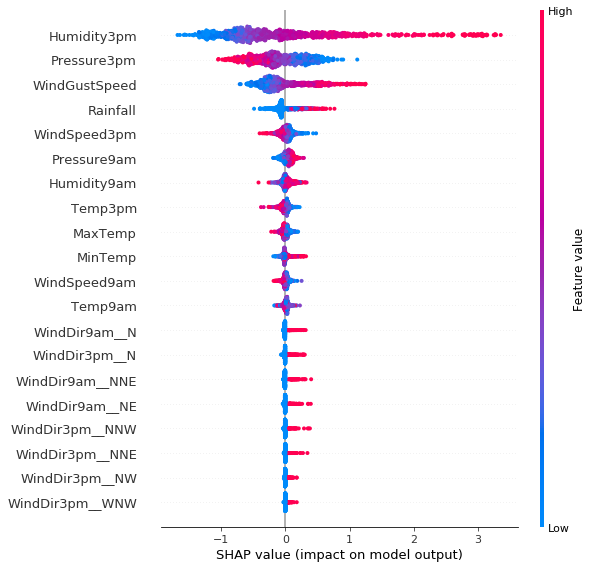

In [62]:
shap.summary_plot(shap_values, features=observations, feature_names=all_features)